In [1]:
import pandas as pd
import scanpy as sc
import warnings
warnings.filterwarnings('ignore')
import sys
import numpy as np
import matplotlib.pyplot as plt
sys.path.append('F:/HLL/SpatialCell')
import seaborn as sns
sc.settings.set_figure_params(dpi=50, facecolor="white")

In [104]:
adata = sc.read_h5ad('F:/HLL/SpatialCell/data/shaped.h5ad')

In [105]:
from SpatialCell.tool import density_2d

import importlib
importlib.reload(density_2d) 

<module 'SpatialCell.tool.density_2d' from 'F:\\HLL/SpatialCell\\SpatialCell\\tool\\density_2d.py'>

In [106]:
sub = adata[(adata.obs['Image'] == '1932246') & (adata.obs['Parent'] == 'TC5') ] 
df = sub.obs[['Centroid X µm', 'Centroid Y µm', 'label']]
df = df[df['label'] == 'SPON2']

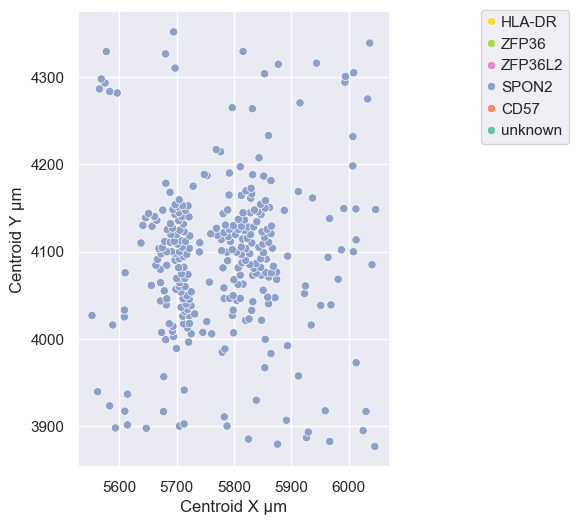

In [107]:
fig, ax = plt.subplots(
        figsize=(4, 6), )  # Get the Figure object to save

sns.scatterplot(data=df, 
                x='Centroid X µm', 
                y='Centroid Y µm', 
                hue='label', palette='Set2')
handles, labels = (ax.get_legend_handles_labels())  # for reversing the order of the legend

matplotlib_bbox_to_anchor=(0.6,0,1, 1.02)  # for adjusting the legend position
ax.legend(
    reversed(handles),
    reversed(labels),
    bbox_to_anchor=matplotlib_bbox_to_anchor,)

In [ ]:
density_2d.compute_density(adata,
                   group_name='Image',
                   batch = 'Parent',
                   bins = 10)

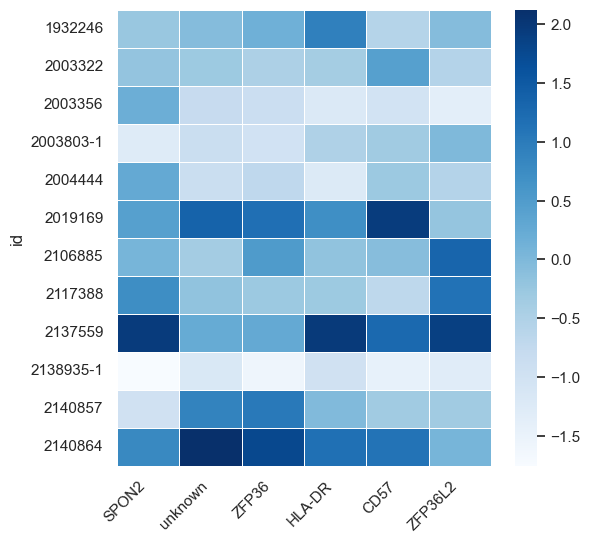

In [109]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

data = adata.uns['density_2d'].drop('roi', axis=1)
data = data.groupby('id').mean()
column_mean = data.mean(axis=0)
column_std = data.std(axis=0)
data_normalized =  (data - column_mean) / column_std 

f, ax = plt.subplots(figsize=(6, 6))
sns.heatmap(data_normalized,linewidths=.5, ax=ax,cmap ='Blues')
plt.xticks(rotation=45 , ha = 'right')
plt.show()


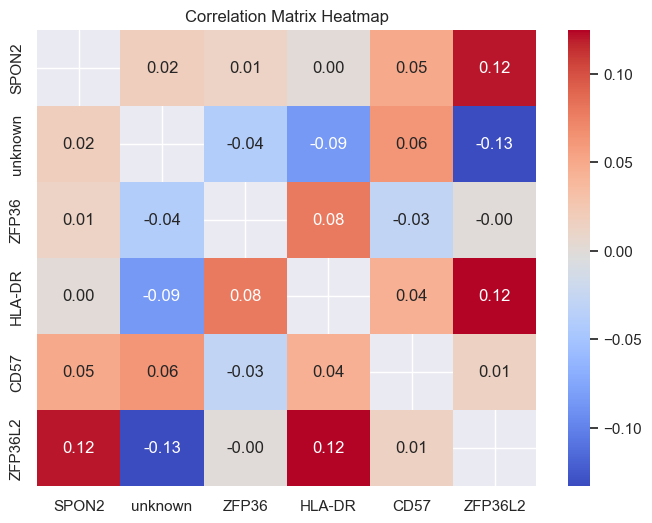

In [110]:
data = adata.uns['density_2d'].drop(['id','roi'], axis=1)
correlation_matrix = data.corr()
np.fill_diagonal(correlation_matrix.values, np.nan)
# 绘制相关性热图
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Matrix Heatmap")
plt.show()

In [111]:
adata.write_h5ad('F:/HLL/SpatialCell/data/density.h5ad')